# Support Vector Machine

#### Support vector：training set中，離`boundary`最近的幾個vector，用來決定`boundary`
- 若有`n` features，至少會有`n+1`個support vector
- 只需利用`Support vector`計算`Margin`，並最大化`Margin`取得最佳解
- 只需使用`Support vector`訓練，快速
    
#### Margin：`Support vector`距離`boundary`的距離
- **需要 Max(margin)**
<img src="https://github.com/MiaZhang17/Study/blob/main/MachineLearning/piecures/svm_1.png?raw=true" style="width:300px;"/>

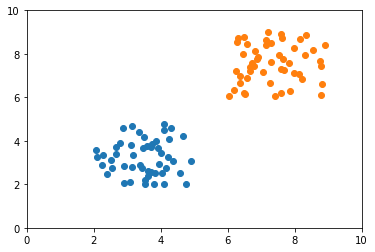

In [19]:
import numpy as np
import matplotlib.pyplot as plt
n = 50
x1 = np.random.uniform(2, 5, n)
y1 = np.random.uniform(2, 5, n)
x2 = np.random.uniform(6, 9, n)
y2 = np.random.uniform(6, 9, n)

fig = plt.figure()
plt.scatter(x1, y1)
plt.scatter(x2, y2)
ax = fig.gca()
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
plt.show()

In [56]:
data = list(zip(x1, y1)) + list(zip(x2, y2))
labels = [0 for i in range(len(x1))] + [1 for i in range(len(x1))]
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


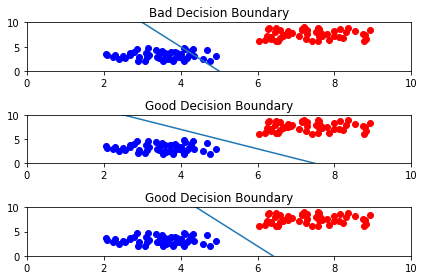

In [52]:
import matplotlib.pyplot as plt
import numpy as np

#Bottom Graph
ax1 = plt.subplot(3, 1, 1)
ax2 = plt.subplot(3, 1, 2)
ax3 = plt.subplot(3, 1, 3)
ax1.set_title('Bad Decision Boundary')
ax2.set_title('Good Decision Boundary')
ax3.set_title('Good Decision Boundary')

ax1.set_xlim(0, 10)
ax1.set_ylim(0, 10)
ax2.set_xlim(0, 10)
ax2.set_ylim(0, 10)
ax3.set_xlim(0, 10)
ax3.set_ylim(0, 10)

ax1.scatter(x1, y1, color='b')
ax1.scatter(x2, y2, color = "r")
ax2.scatter(x1, y1, color='b')
ax2.scatter(x2, y2, color = "r")
ax3.scatter(x1, y1, color='b')
ax3.scatter(x2, y2, color = "r")

#Change the intercept to separate the clusters
# line 1
intercept_two = 25
slope_two = -5

x_vals = np.array(ax.get_xlim())
y_vals = intercept_two + slope_two * x_vals

ax1.plot(x_vals, y_vals, '-')

# line 2
intercept_two = 15
slope_two = -2

x_vals = np.array(ax.get_xlim())
y_vals = intercept_two + slope_two * x_vals
ax2.plot(x_vals, y_vals, '-')

# line 3
intercept_two = 32
slope_two = -5

x_vals = np.array(ax.get_xlim())
y_vals = intercept_two + slope_two * x_vals
ax3.plot(x_vals, y_vals, '-')

plt.tight_layout()
plt.show()

## Boundary

要在各類別的中間，各個類別資料點離Boundary的距離要相同、愈遠愈好

[0 1]


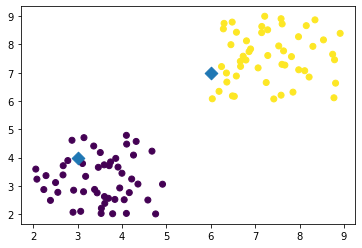

In [74]:
from sklearn.svm import SVC

classifier = SVC(kernel='linear')
classifier.fit(data, labels)

lst = [
  [3,4],
  [6,7]
]
lst_x = [i[0] for i in lst]
lst_y = [i[1] for i in lst]

data_x = [i[0] for i in data]
data_y = [i[1] for i in data]
plt.scatter(data_x, data_y, c=labels)
plt.scatter(lst_x, lst_y, marker='D', s=80)

print(classifier.predict(lst))

## Sklearn
- **C：**SVM有多少error是可被接受的，
    - C愈小：可接受error愈少，容易overfitting
    - C愈大：可接受error愈多，容易underfitting
- **kernel：** 分類方程式，linear、poly...
- **gamma：**

No handles with labels found to put in legend.


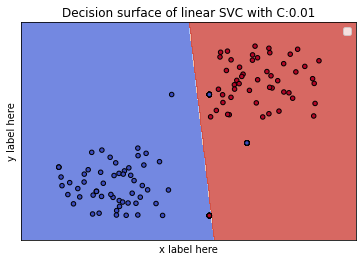

No handles with labels found to put in legend.


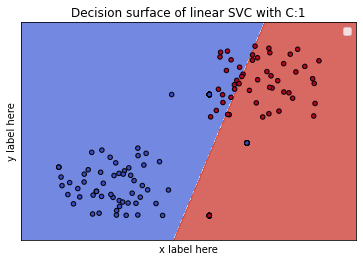

No handles with labels found to put in legend.


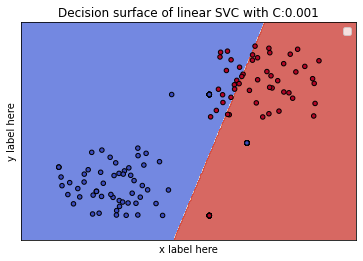

In [105]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

data += [(6,7), (7,5), (6,2)]
data_ary = np.array(data)

labels += [0, 0, 1]

check_c = 0.01
classifier = SVC(kernel='linear', C = check_c)
clf = classifier.fit(data_ary, labels)

fig, ax = plt.subplots()
# title for the plots
title = (f'Decision surface of linear SVC with C:{check_c}')

# Set-up grid for plotting.
X0, X1 = data_ary[:, 0], data_ary[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=labels, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

check_c = 1
classifier = SVC(kernel='linear', C = 1)
clf = classifier.fit(data_ary, labels)

fig, ax = plt.subplots()
# title for the plots
title = (f'Decision surface of linear SVC with C:{check_c}')

# Set-up grid for plotting.
X0, X1 = data_ary[:, 0], data_ary[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=labels, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()


check_c = 0.001
classifier = SVC(kernel='linear', C = 1)
clf = classifier.fit(data_ary, labels)

fig, ax = plt.subplots()
# title for the plots
title = (f'Decision surface of linear SVC with C:{check_c}')

# Set-up grid for plotting.
X0, X1 = data_ary[:, 0], data_ary[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=labels, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

No handles with labels found to put in legend.


1.0


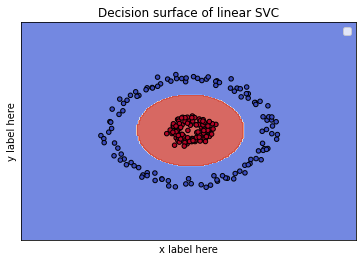

In [116]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

#Makes concentric circles
points, labels = make_circles(n_samples=300, factor=.2, noise=.05, random_state = 1)

training_data, validation_data, training_labels, validation_labels = train_test_split(points, labels, train_size = 0.8, test_size = 0.2, random_state = 100)

classifier = SVC(kernel='poly', degree=2)
clf = classifier.fit(training_data, training_labels)
print(classifier.score(validation_data, validation_labels))

############
fig, ax = plt.subplots()
title = (f'Decision surface of linear SVC')
# Set-up grid for plotting.
X0, X1 = training_data[:, 0], training_data[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=training_labels, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

## 2D data to 3D

有時將2D 資料轉換成3D比較好分類

$(x, y) \text{  ->} (\sqrt{2} x y, x^2, y^2)$

$(1, 2) \text{  ->} (2 \sqrt{2}, 1, 4)$

<img src="https://github.com/MiaZhang17/Study/blob/main/MachineLearning/piecures/svm_3D.png?raw=true" style="width:400px;"/>

No handles with labels found to put in legend.


0.5666666666666667
[0.31860062 0.11705731]
1.0


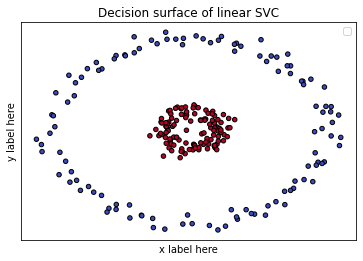

In [113]:
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

#Makes concentric circles
points, labels = make_circles(n_samples=300, factor=.2, noise=.05, random_state = 1)

#Makes training set and validation set.
training_data, validation_data, training_labels, validation_labels = train_test_split(points, labels, train_size = 0.8, test_size = 0.2, random_state = 100)

classifier = SVC(kernel = "linear", random_state = 1)
classifier.fit(training_data, training_labels)
print(classifier.score(validation_data, validation_labels))

print(training_data[0])
new_training = []
new_validation = []
for point in training_data:
    new_training.append([point[0]*point[1]* (2**0.5), point[0]**2, point[1]**2])

for point in validation_data:
    new_validation.append([point[0]*point[1]* (2**0.5), point[0]**2, point[1]**2])

clf = classifier.fit(new_training, training_labels)
print(classifier.score(new_validation, validation_labels))

############
fig, ax = plt.subplots()
title = (f'Decision surface of linear SVC')
# Set-up grid for plotting.
X0, X1 = training_data[:, 0], training_data[:, 1]
xx, yy = make_meshgrid(X0, X1)

# plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=training_labels, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

#### sklearn
- **gamma**：kernel選RBF後有的參數
- gamma愈大，support vector愈少，容易underfitting
- gamma愈小，support vector愈多，容易overfitting

0.7777777777777778


No handles with labels found to put in legend.


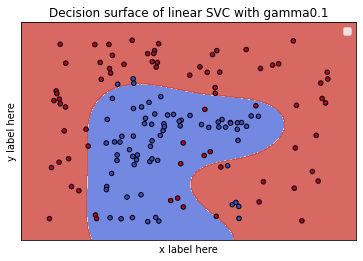

0.8888888888888888


No handles with labels found to put in legend.


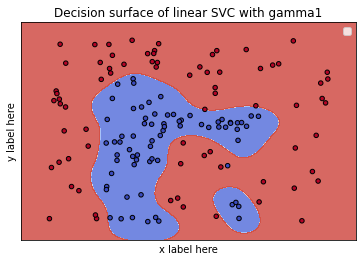

0.7222222222222222


No handles with labels found to put in legend.


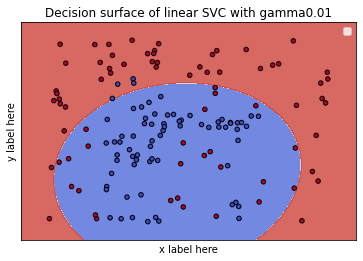

In [120]:
from data import points, labels
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

training_data, validation_data, training_labels, validation_labels = train_test_split(points, labels, train_size = 0.8, test_size = 0.2, random_state = 100)

gamma = 0.1
classifier = SVC(gamma=gamma)
clf = classifier.fit(training_data, training_labels)
print(classifier.score(validation_data, validation_labels))

############
fig, ax = plt.subplots()
title = (f'Decision surface of linear SVC with gamma：{gamma}')
# Set-up grid for plotting.
X0, X1 = training_data[:, 0], training_data[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=training_labels, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

gamma=1
classifier = SVC(gamma=gamma)
clf = classifier.fit(training_data, training_labels)
print(classifier.score(validation_data, validation_labels))

############
fig, ax = plt.subplots()
title = (f'Decision surface of linear SVC with gamma：{gamma}')
# Set-up grid for plotting.
X0, X1 = training_data[:, 0], training_data[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=training_labels, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()


gamma=0.01
classifier = SVC(gamma=gamma)
clf = classifier.fit(training_data, training_labels)
print(classifier.score(validation_data, validation_labels))

############
fig, ax = plt.subplots()
title = (f'Decision surface of linear SVC with gamma：{gamma}')
# Set-up grid for plotting.
X0, X1 = training_data[:, 0], training_data[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=training_labels, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()